##Цель:

Применить на практике алгоритмы по автоматической оптимизации параметров моделей машинного обучения.

**Описание задания:**

В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов наиболее эффективно. Данные для обучения моделей необходимо загрузить самостоятельно с [сайта](https://www.kaggle.com/fedesoriano/heart-failure-prediction). Целевая переменная – наличие болезни сердца (HeartDisease). Она принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. Подробное описание признаков можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.

In [ ]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

**1) Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)**

In [ ]:
data = pd.read_csv('heart.csv')

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Подготовьте датасет к обучению моделей:**

a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

Посмотрим основую информацию о датафрейме и основные статистики

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Сделаем бинарное кодирование колонки Sex

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
data['Sex'] = le.fit_transform(data['Sex'])

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0


Остальные колонки с типом данных object преобразуем через get_dummies

In [ ]:
dummies = pd.get_dummies(data.select_dtypes('object'))

In [ ]:
heart = pd.concat([data.select_dtypes(['int','float']),dummies], axis = 1)

Построим график зависимости по всем возможным признакам

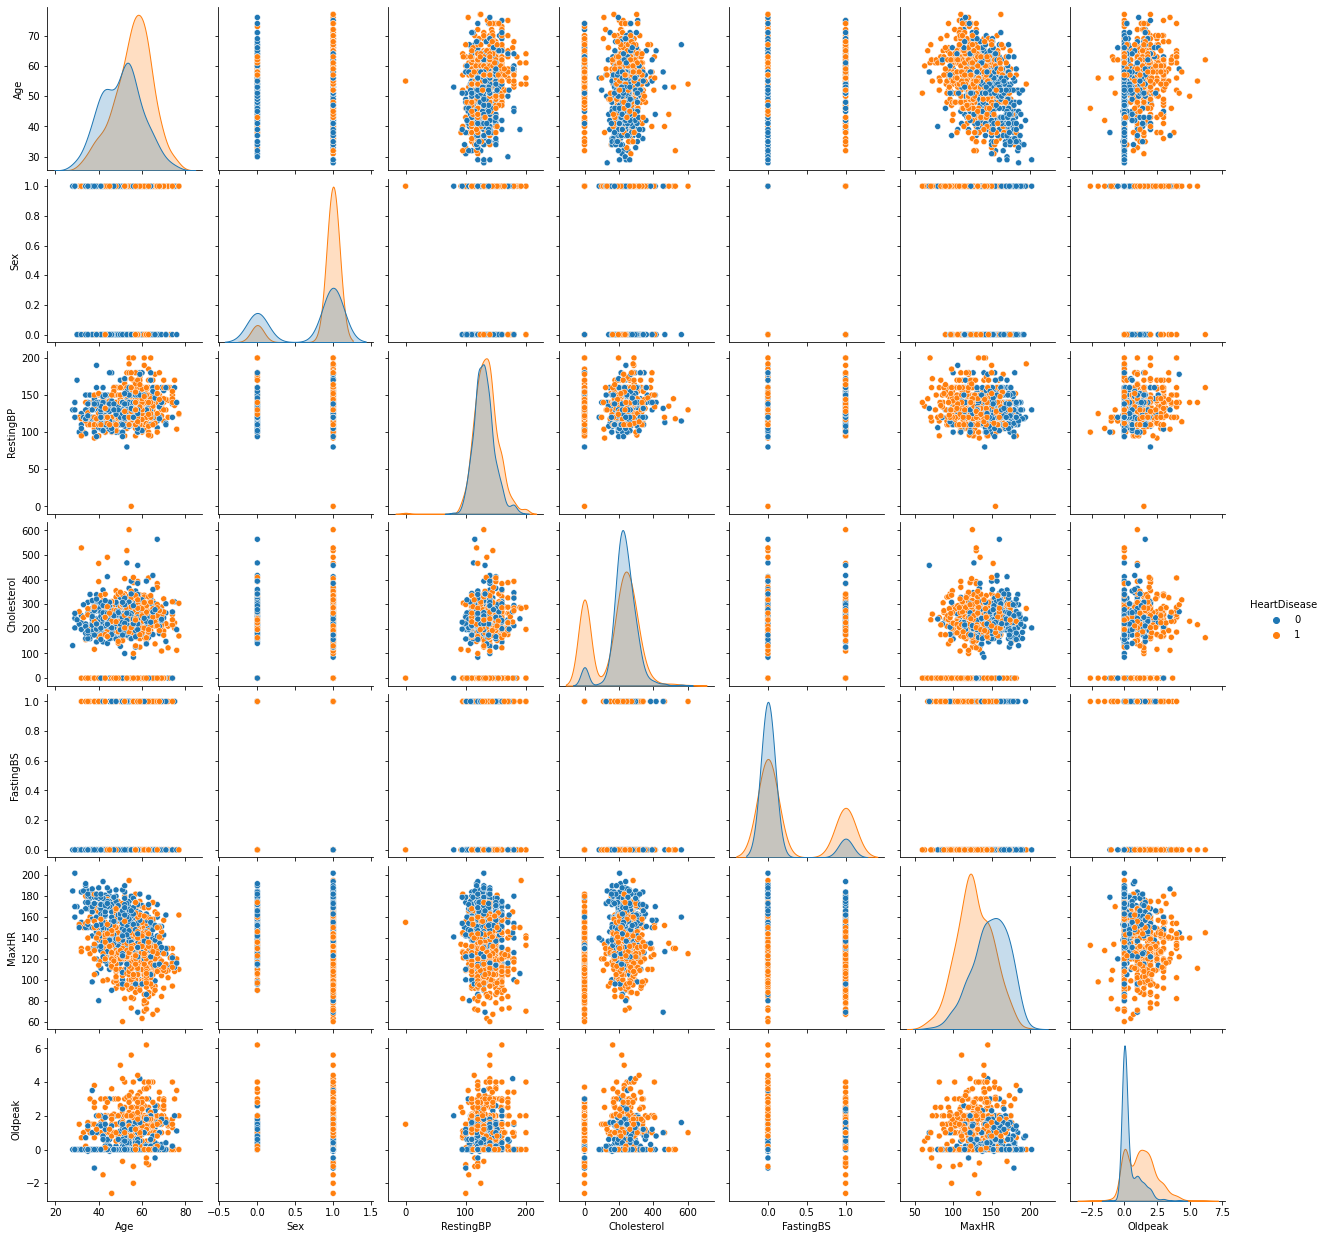

In [ ]:
sns.pairplot(data, hue = 'HeartDisease')

Попробуем с помощью визуализаций определить есть ли выбросы в данных

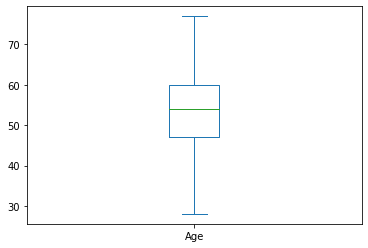

In [ ]:
heart['Age'].plot(kind='box')

Выбросов выбросов в колонке Age нет

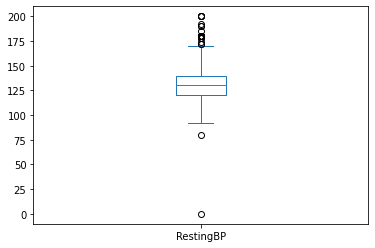

In [ ]:
heart['RestingBP'].plot(kind='box')

Видим что есть один выброс с арттериальным давлением 0. Такого быть не должно, если пациент живой

In [ ]:
heart[heart['RestingBP'] == 0]

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
449,55,1,0,0,0,155,1.5,1,0,0,1,0,0,1,0,1,0,0,1,0


Как видим у данного пациента, отсутствуют и другие значения, так как он единственный, то данную строку просто удалим

In [ ]:
heart =  heart[heart['RestingBP'] != 0]

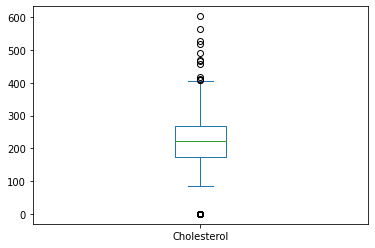

In [ ]:
heart['Cholesterol'].plot(kind='box')

In [ ]:
heart[heart['Cholesterol'] == 0]

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
293,65,1,115,0,0,93,0.0,1,1,0,0,0,0,1,0,0,1,0,1,0
294,32,1,95,0,1,127,0.7,1,0,0,0,1,0,1,0,1,0,0,0,1
295,61,1,105,0,1,110,1.5,1,1,0,0,0,0,1,0,0,1,0,0,1
296,50,1,145,0,1,139,0.7,1,1,0,0,0,0,1,0,0,1,0,1,0
297,57,1,110,0,1,131,1.4,1,1,0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,1,122,0,0,120,0.5,1,1,0,0,0,0,1,0,1,0,0,0,1
515,63,1,130,0,1,160,3.0,0,0,0,1,0,0,0,1,1,0,0,1,0
518,48,1,102,0,1,110,1.0,1,0,0,1,0,0,0,1,0,1,1,0,0
535,56,1,130,0,0,122,1.0,1,1,0,0,0,1,0,0,0,1,0,1,0


Нулевые значения скорее всего соответствуют очень низкому уровню холестирина, так как таких данных много, то лучше их оставить без изменений

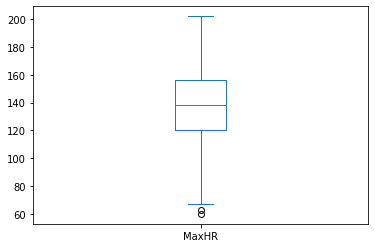

In [ ]:
heart['MaxHR'].plot(kind='box')

В колонке MaxHR выбросов нет

**3)Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.**

In [ ]:
X = heart[['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'Oldpeak','ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']]

In [ ]:
scaler = StandardScaler()
X_scal = scaler.fit_transform(X)

In [ ]:
y = heart['HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scal, y, test_size=0.2, random_state=42)

**4)Обучите модель логистической регрессии с параметрами по умолчанию.**

In [ ]:
lr = LogisticRegression(random_state = 42)

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

**5) Подсчитайте основные метрики модели. Используйте следующие метрики и функцию:**

cross_validate(…, cv=10, scoring=[‘accuracy’,‘recall’,‘precision’,‘f1’])

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
scores = cross_validate(lr, X_test, y_test, cv=10, scoring=['accuracy','recall','precision','f1'])

In [ ]:
scores.keys()

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_recall', 'test_precision', 'test_f1'])

*Accuracy*

In [ ]:
print(scores['test_accuracy'], f"Среднее значение {scores['test_accuracy'].mean()}", sep = '\n')

[0.84210526 0.89473684 0.78947368 0.94736842 0.83333333 0.83333333
 0.83333333 0.77777778 1.         0.72222222]
Среднее значение 0.8473684210526315


Recall

In [ ]:
print(scores['test_recall'], f"Среднее значение {scores['test_recall'].mean()}", sep = '\n')

[0.90909091 0.81818182 0.83333333 0.91666667 0.90909091 0.81818182
 0.90909091 0.90909091 1.         0.81818182]
Среднее значение 0.8840909090909091


*Precision*

In [ ]:
print(scores['test_precision'], f"Среднее значение {scores['test_precision'].mean()}", sep = '\n')

[0.83333333 1.         0.83333333 1.         0.83333333 0.9
 0.83333333 0.76923077 1.         0.75      ]
Среднее значение 0.8752564102564102


*F1 мера*

In [ ]:
print(scores['test_f1'], f"Среднее значение {scores['test_f1'].mean()}", sep = '\n')

[0.86956522 0.9        0.83333333 0.95652174 0.86956522 0.85714286
 0.86956522 0.83333333 1.         0.7826087 ]
Среднее значение 0.8771635610766045


**6)Оптимизируйте 3-4 параметра модели:**

a) Используйте [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lr_grid = LogisticRegression(random_state= 42)

In [ ]:
param_grid = {'penalty':['l1', 'l2', 'elasticnet','None'],
              'class_weight': [None, 'balanced'],
              'solver':['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
              'multi_class':['auto', 'ovr', 'multinomial']}

In [ ]:
grid = GridSearchCV(lr_grid, param_grid, cv=10, scoring='accuracy')

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.best_estimator_

LogisticRegression(class_weight='balanced', penalty='l1', random_state=42,
                   solver='liblinear')

In [ ]:
lr2 = LogisticRegression(class_weight='balanced', multi_class='multinomial',
                   random_state=42, solver='newton-cg')

In [ ]:
lr2.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', multi_class='multinomial',
                   random_state=42, solver='newton-cg')

In [ ]:
scores_grid = cross_validate(lr2, X_test, y_test, cv=10, scoring=['accuracy','recall','precision','f1'])

*Accuracy*

In [ ]:
print(scores_grid['test_accuracy'], f"Среднее значение {scores_grid['test_accuracy'].mean()}", sep = '\n')

[0.84210526 0.89473684 0.73684211 0.94736842 0.83333333 0.77777778
 0.83333333 0.77777778 1.         0.61111111]
Среднее значение 0.8254385964912281


*Recall*

In [ ]:
print(scores_grid['test_recall'], f"Среднее значение {scores_grid['test_recall'].mean()}", sep = '\n')

[0.90909091 0.81818182 0.75       0.91666667 0.90909091 0.72727273
 0.90909091 0.90909091 1.         0.63636364]
Среднее значение 0.8484848484848484


*Precision*

In [ ]:
print(scores_grid['test_precision'], f"Среднее значение {scores_grid['test_precision'].mean()}", sep = '\n')

[0.83333333 1.         0.81818182 1.         0.83333333 0.88888889
 0.83333333 0.76923077 1.         0.7       ]
Среднее значение 0.8676301476301477


*F1 мера*

In [ ]:
print(scores_grid['test_f1'], f"Среднее значение {scores_grid['test_f1'].mean()}", sep = '\n')

[0.86956522 0.9        0.7826087  0.95652174 0.86956522 0.8
 0.86956522 0.83333333 1.         0.66666667]
Среднее значение 0.854782608695652


b) Используйте [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
lr_rand_search = LogisticRegression(random_state = 42)

In [ ]:
grid_random = RandomizedSearchCV(lr_rand_search, param_grid, cv=10, scoring='accuracy')

In [ ]:
grid_random.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1471, in fit
    raise ValueError(
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

--------------------------------------------------------------------------------
30 fits failed with the following error:
Trace

RandomizedSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'None'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [ ]:
grid_random.best_estimator_

LogisticRegression(class_weight='balanced', multi_class='ovr', random_state=42,
                   solver='newton-cg')

In [ ]:
lr_rand_search = LogisticRegression(class_weight='balanced', multi_class='multinomial',
                   random_state=42)

In [ ]:
scores_grid_random = cross_validate(lr_rand_search, X_test, y_test, cv=10, scoring=['accuracy','recall','precision','f1'])

*Accuracy*

In [ ]:
print(scores_grid_random['test_accuracy'], f"Среднее значение {scores_grid_random['test_accuracy'].mean()}", sep = '\n')

[0.84210526 0.89473684 0.73684211 0.94736842 0.83333333 0.77777778
 0.83333333 0.77777778 1.         0.61111111]
Среднее значение 0.8254385964912281


*Recall*

In [ ]:
print(scores_grid_random['test_recall'], f"Среднее значение {scores_grid_random['test_recall'].mean()}", sep = '\n')

[0.90909091 0.81818182 0.75       0.91666667 0.90909091 0.72727273
 0.90909091 0.90909091 1.         0.63636364]
Среднее значение 0.8484848484848484


*Precision*

In [ ]:
print(scores_grid_random['test_precision'], f"Среднее значение {scores_grid_random['test_precision'].mean()}", sep = '\n')

[0.83333333 1.         0.81818182 1.         0.83333333 0.88888889
 0.83333333 0.76923077 1.         0.7       ]
Среднее значение 0.8676301476301477


*F1 мера*

In [ ]:
print(scores_grid_random['test_f1'], f"Среднее значение {scores_grid_random['test_f1'].mean()}", sep = '\n')

[0.86956522 0.9        0.7826087  0.95652174 0.86956522 0.8
 0.86956522 0.83333333 1.         0.66666667]
Среднее значение 0.854782608695652


c) *Добавьте в п. 6b 2-5 моделей классификации и вариации их параметров.

Random Forest

---



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state= 42)

In [ ]:
grid_rfc = RandomizedSearchCV(rfc, {'max_depth': list(range(1,30)), 'min_samples_leaf':list(range(1,30)), 'n_estimators': [100, 200, 300, 400, 500]},
                              cv=10, scoring='accuracy')

In [ ]:
grid_rfc.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29],
                                        'n_estimators': [100, 200, 300,

In [ ]:
grid_rfc.best_estimator_

RandomForestClassifier(max_depth=22, min_samples_leaf=8, random_state=42)

In [ ]:
rfc = RandomForestClassifier(max_depth=16, min_samples_leaf=5, n_estimators=200,
                       random_state=42)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=16, min_samples_leaf=5, n_estimators=200,
                       random_state=42)

In [ ]:
scores_grid_rfc = cross_validate(rfc, X_test, y_test, cv=10, scoring=['accuracy','recall','precision','f1'])

*Accuracy*

In [ ]:
print(scores_grid_rfc['test_accuracy'], f"Среднее значение {scores_grid_rfc['test_accuracy'].mean()}", sep = '\n')

[0.94736842 0.84210526 0.78947368 1.         0.77777778 0.83333333
 0.88888889 0.77777778 1.         0.83333333]
Среднее значение 0.8690058479532163


*Recall*

In [ ]:
print(scores_grid_rfc['test_recall'], f"Среднее значение {scores_grid_rfc['test_recall'].mean()}", sep = '\n')

[1.         0.81818182 0.91666667 1.         0.90909091 0.81818182
 1.         0.90909091 1.         0.90909091]
Среднее значение 0.928030303030303


*Precision*

In [ ]:
print(scores_grid_rfc['test_precision'], f"Среднее значение {scores_grid_rfc['test_precision'].mean()}", sep = '\n')

[0.91666667 0.9        0.78571429 1.         0.76923077 0.9
 0.84615385 0.76923077 1.         0.83333333]
Среднее значение 0.8720329670329671


*F1 мера*

In [ ]:
print(scores_grid_rfc['test_f1'], f"Среднее значение {scores_grid_rfc['test_f1'].mean()}", sep = '\n')

[0.95652174 0.85714286 0.84615385 1.         0.83333333 0.85714286
 0.91666667 0.83333333 1.         0.86956522]
Среднее значение 0.8969859850294633


SVC

---



In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(random_state = 42)

In [ ]:
grid_svc = RandomizedSearchCV(svc, {'kernel':['linear','poly', 'rbf', 'sigmoid'],'C':list(range(1,10)), 'class_weight':[None, 'balanced' ]}, cv=10, scoring='accuracy')

In [ ]:
grid_svc.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=SVC(random_state=42),
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                                        'class_weight': [None, 'balanced'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   scoring='accuracy')

In [ ]:
grid_svc.best_estimator_

SVC(C=1, random_state=42)

In [ ]:
svc = SVC(C=1, class_weight='balanced', kernel='linear', random_state=42)

In [ ]:
svc.fit(X_train, y_train)

SVC(C=1, class_weight='balanced', kernel='linear', random_state=42)

In [ ]:
scores_grid_svc = cross_validate(svc, X_test, y_test, cv=10, scoring=['accuracy','recall','precision','f1'])

*Accuracy*

In [ ]:
print(scores_grid_svc['test_accuracy'], f"Среднее значение {scores_grid_svc['test_accuracy'].mean()}", sep = '\n')

[0.84210526 0.84210526 0.84210526 0.94736842 0.88888889 0.77777778
 0.88888889 0.83333333 1.         0.72222222]
Среднее значение 0.8584795321637426


*Recall*

In [ ]:
print(scores_grid_svc['test_recall'], f"Среднее значение {scores_grid_svc['test_recall'].mean()}", sep = '\n')

[0.90909091 0.72727273 0.91666667 0.91666667 1.         0.72727273
 1.         0.90909091 1.         0.81818182]
Среднее значение 0.8924242424242423


*Precision*

In [ ]:
print(scores_grid_svc['test_precision'], f"Среднее значение {scores_grid_svc['test_precision'].mean()}", sep = '\n')

[0.83333333 1.         0.84615385 1.         0.84615385 0.88888889
 0.84615385 0.83333333 1.         0.75      ]
Среднее значение 0.8844017094017094


*F1 мера*

In [ ]:
print(scores_grid_svc['test_f1'], f"Среднее значение {scores_grid_svc['test_f1'].mean()}", sep = '\n')

[0.86956522 0.84210526 0.88       0.95652174 0.91666667 0.8
 0.91666667 0.86956522 1.         0.7826087 ]
Среднее значение 0.8833699466056446


**7)Сформулируйте выводы по проделанной работе:**

Сравните метрики построенных моделей


In [ ]:
model_scores = pd.DataFrame({'Модель':['LogisticRegression','LogisticRegression GridSearchCV',
                                       'LogisticRegression RandomizedSearchCV',
                                       'RandomForestClassifier RandomizedSearchCV','SVC RandomizedSearchCV'],
                             'Accuracy':[scores['test_accuracy'].mean(),scores_grid['test_accuracy'].mean(),
                                         scores_grid_random['test_accuracy'].mean(),scores_grid_rfc['test_accuracy'].mean(),
                                         scores_grid_svc['test_accuracy'].mean()],
                             'Recall':[scores['test_recall'].mean(),scores_grid['test_recall'].mean(),
                                       scores_grid_random['test_recall'].mean(),scores_grid_rfc['test_recall'].mean(),
                                       scores_grid_svc['test_recall'].mean()],
                            'Precision':[scores['test_precision'].mean(),scores_grid['test_recall'].mean(),
                                         scores_grid_random['test_precision'].mean(),scores_grid_rfc['test_precision'].mean(),
                                         scores_grid_svc['test_precision'].mean()],
                            'F1':[scores['test_f1'].mean(),scores_grid['test_f1'].mean(),
                                  scores_grid_random['test_f1'].mean(),scores_grid_rfc['test_f1'].mean(),
                                  scores_grid_svc['test_f1'].mean()]})

In [ ]:
model_scores.sort_values('Accuracy', ascending = False)

,Модель,Accuracy,Recall,Precision,F1
3,RandomForestClassifier RandomizedSearchCV,0.869006,0.928030,0.872033,0.896986
4,SVC RandomizedSearchCV,0.858480,0.892424,0.884402,0.883370
0,LogisticRegression,0.847368,0.884091,0.875256,0.877164
1,LogisticRegression GridSearchCV,0.825439,0.848485,0.848485,0.854783
2,LogisticRegression RandomizedSearchCV,0.825439,0.848485,0.867630,0.854783


Лучшие метрики показала модель логистической регрессии с параметрами по умолчанию, возможно что при переборе большего числа параметров, результат бы оказался другим, либо параметры модели изначально настроены таким образом, чтобы давать лучший результат